<a href="https://www.kaggle.com/code/goutham01/credit-card-churn-prediction?scriptVersionId=159694175" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [142]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [143]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [144]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [146]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [147]:
df.duplicated().sum()

0

In [148]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [149]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis = 1,inplace = True)

In [150]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [151]:
df=pd.get_dummies(df,columns =['Geography','Gender'],drop_first=True,dtype = int)
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


In [152]:
X = df.drop('Exited',axis = 1)
y = df['Exited']

In [153]:
X,y

(      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 0             619   42       2       0.00              1          1   
 1             608   41       1   83807.86              1          0   
 2             502   42       8  159660.80              3          1   
 3             699   39       1       0.00              2          0   
 4             850   43       2  125510.82              1          1   
 ...           ...  ...     ...        ...            ...        ...   
 9995          771   39       5       0.00              2          1   
 9996          516   35      10   57369.61              1          1   
 9997          709   36       7       0.00              1          0   
 9998          772   42       3   75075.31              2          1   
 9999          792   28       4  130142.79              1          1   
 
       IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
 0                  1        101348.88                  

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [156]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5951,721,41,7,0.00,2,0,1,61018.85,0,0,1
6630,741,36,3,0.00,2,1,1,89804.83,0,0,0
3240,580,50,0,125647.36,1,1,0,57541.08,0,0,1
5942,517,53,0,109172.88,1,1,0,54676.10,1,0,1
3789,609,45,4,89122.30,1,1,1,199256.98,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3714,823,34,3,105057.33,1,1,0,9217.92,0,0,1
7409,807,42,9,105356.09,2,1,1,130489.37,1,0,0
3325,527,32,7,0.00,2,1,1,44099.75,0,0,0
9606,524,44,10,118569.03,2,0,0,82117.20,0,0,1


In [157]:
y_train

5951    0
6630    0
3240    1
5942    1
3789    0
       ..
3714    0
7409    0
3325    0
9606    0
5787    0
Name: Exited, Length: 8000, dtype: int64

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Deep Learning ANN  Model

In [159]:
import tensorflow
from tensorflow.keras import layers,Sequential  
from tensorflow.keras.layers import Dense

In [174]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=11))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [175]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                384       
                                                                 
 dense_33 (Dense)            (None, 64)                2112      
                                                                 
 dense_34 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [176]:
from tensorflow.keras.callbacks import EarlyStopping

In [163]:
earlystop =EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [164]:
earlystop

In [177]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [178]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split = 0.2,callbacks = earlystop)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5640 - accuracy: 0.7073 - val_loss: 0.4628 - val_accuracy: 0.8025
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4434 - accuracy: 0.8022 - val_loss: 0.4354 - val_accuracy: 0.8094
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8159 - val_loss: 0.4277 - val_accuracy: 0.8100
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4138 - accuracy: 0.8188 - val_loss: 0.4219 - val_accuracy: 0.8150
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8244 - val_loss: 0.4149 - val_accuracy: 0.8163
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3985 - accuracy: 0.8309 - val_loss: 0.4068 - val_accuracy: 0.8213
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3899 - accuracy: 0.8380 - val_loss: 0.3955 - val_accuracy: 0.8269

In [179]:
model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


array([[0.05368242],
       [0.08181196],
       [0.62235045],
       ...,
       [0.03431563],
       [0.4860085 ],
       [0.3195972 ]], dtype=float32)

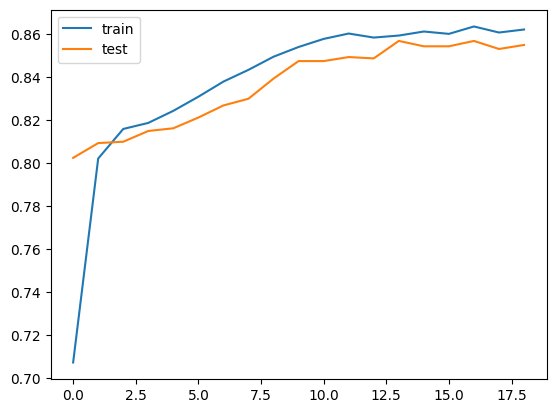

In [180]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'],label = 'test')
plt.legend()
plt.show()

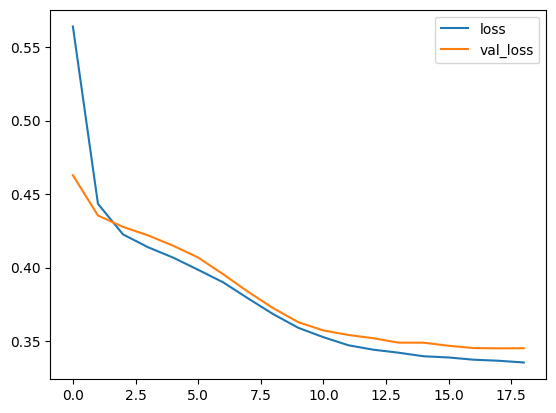

In [184]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [181]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8580


[0.35246703028678894, 0.8579999804496765]

In [185]:
y_pred=model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [186]:
y_pred = np.where(y_pred > 0.5,1,0)
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [187]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.858

In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1564
           1       0.77      0.50      0.61       436

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

